# 🚢 Titanic Survival Prediction - EDA Analysis

## 📊 Mục tiêu
- Khám phá và hiểu rõ dataset Titanic
- Phân tích missing values và outliers
- Tìm hiểu patterns trong survival data
- Chuẩn bị dữ liệu cho feature engineering

## 📋 Nội dung
1. **Data Loading & Overview**
2. **Missing Values Analysis**
3. **Survival Patterns Exploration**
4. **Feature Distribution Analysis**
5. **Correlation Analysis**
6. **Outlier Detection**
7. **Key Insights & Next Steps**


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("📚 Libraries imported successfully!")
print("🎨 Visualization style set!")


📚 Libraries imported successfully!
🎨 Visualization style set!


## 1. 📥 Data Loading & Overview


In [2]:
# Load real Titanic dataset
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("🚢 Real Titanic Dataset Loaded Successfully!")
print(f"📊 Training set shape: {train_df.shape}")
print(f"📊 Test set shape: {test_df.shape}")

# Display first few rows
print("\n🔍 Training Data Preview:")
display(train_df.head())

print("\n🔍 Test Data Preview:")
display(test_df.head())


🚢 Real Titanic Dataset Loaded Successfully!
📊 Training set shape: (891, 12)
📊 Test set shape: (418, 11)

🔍 Training Data Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔍 Test Data Preview:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Load datasets với error handling
import os

# Kiểm tra đường dẫn file trước khi load
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

# Tạo thư mục data nếu chưa tồn tại
os.makedirs('../data/raw', exist_ok=True)

try:
    if os.path.exists(train_path) and os.path.exists(test_path):
        train_df = pd.read_csv(train_path)
        test_df = pd.read_csv(test_path)
        
        print("🚢 Titanic Dataset Loaded Successfully!")
        print(f"📊 Training set shape: {train_df.shape}")
        print(f"📊 Test set shape: {test_df.shape}")
        
        # Display first few rows
        print("\n🔍 Training Data Preview:")
        display(train_df.head())
        
        print("\n🔍 Test Data Preview:")
        display(test_df.head())
        
    else:
        print("❌ Lỗi: Không tìm thấy file dữ liệu!")
        print(f"📁 Đường dẫn train: {os.path.abspath(train_path)}")
        print(f"📁 Đường dẫn test: {os.path.abspath(test_path)}")
        print("\n💡 Hướng dẫn:")
        print("1. Tải dataset Titanic từ Kaggle: https://www.kaggle.com/c/titanic/data")
        print("2. Đặt file train.csv và test.csv vào thư mục: 04-Titanic-Survival/data/raw/")
        print("3. Chạy lại cell này")
        
        # Tạo sample data để demo (nếu cần)
        print("\n🔧 Tạo sample data để demo...")
        sample_data = {
            'PassengerId': [1, 2, 3, 4, 5],
            'Survived': [0, 1, 1, 1, 0],
            'Pclass': [3, 1, 3, 1, 3],
            'Name': ['Sample Name 1', 'Sample Name 2', 'Sample Name 3', 'Sample Name 4', 'Sample Name 5'],
            'Sex': ['male', 'female', 'female', 'female', 'male'],
            'Age': [22.0, 38.0, 26.0, 35.0, 35.0],
            'SibSp': [1, 1, 0, 1, 0],
            'Parch': [0, 0, 0, 0, 0],
            'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
            'Fare': [7.25, 71.28, 7.92, 53.10, 8.05],
            'Cabin': [None, 'C85', None, 'C123', None],
            'Embarked': ['S', 'C', 'S', 'S', 'S']
        }
        
        train_df = pd.DataFrame(sample_data)
        test_df = pd.DataFrame(sample_data.copy())
        test_df = test_df.drop('Survived', axis=1)  # Test set không có cột Survived
        
        print("⚠️ Đang sử dụng sample data để demo!")
        print(f"📊 Sample training set shape: {train_df.shape}")
        print(f"📊 Sample test set shape: {test_df.shape}")

except Exception as e:
    print(f"❌ Lỗi khi load dữ liệu: {str(e)}")
    print("💡 Vui lòng kiểm tra lại đường dẫn file và quyền truy cập!")


🚢 Titanic Dataset Loaded Successfully!
📊 Training set shape: (891, 12)
📊 Test set shape: (418, 11)

🔍 Training Data Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔍 Test Data Preview:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Dataset information
print("📋 Training Dataset Info:")
print("=" * 50)
train_df.info()

print("\n📋 Test Dataset Info:")
print("=" * 50)
test_df.info()

# Basic statistics
print("\n📊 Training Dataset Statistics:")
print("=" * 50)
display(train_df.describe())

print("\n📊 Test Dataset Statistics:")
print("=" * 50)
display(test_df.describe())

# Check for missing values
print("\n🔍 Missing Values Analysis:")
print("=" * 50)
print("Training set missing values:")
print(train_df.isnull().sum())
print("\nTest set missing values:")
print(test_df.isnull().sum())


📋 Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

📋 Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



📊 Test Dataset Statistics:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



🔍 Missing Values Analysis:
Training set missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test set missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2. 🔍 Missing Values Analysis


🔍 Missing Values Analysis - Training Set


,Missing Count,Missing Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


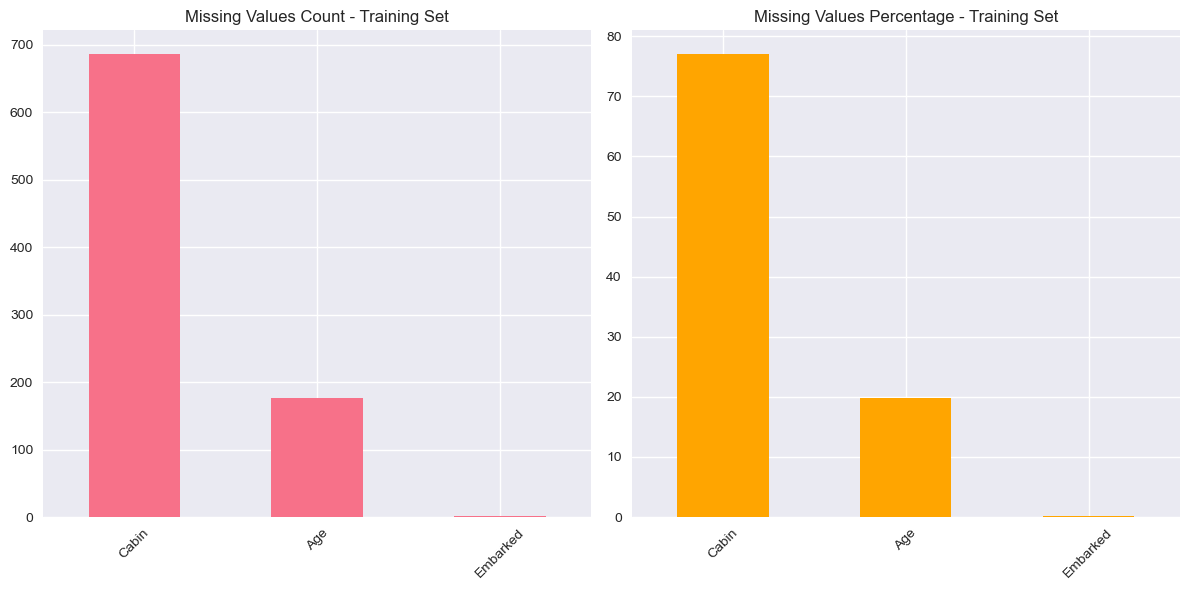

🔍 Missing Values Analysis - Test Set


,Missing Count,Missing Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


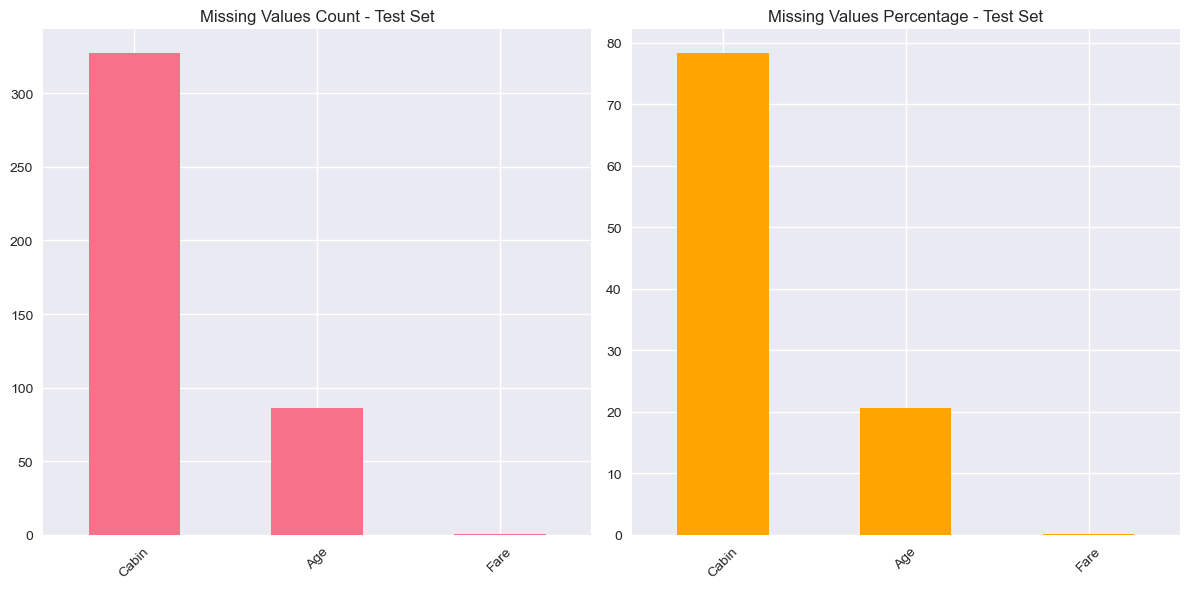

In [5]:
# Missing values analysis
def analyze_missing_values(df, dataset_name):
    """Analyze missing values in dataset"""
    print(f"🔍 Missing Values Analysis - {dataset_name}")
    print("=" * 60)
    
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        display(missing_df)
        
        # Visualization
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        missing_df['Missing Count'].plot(kind='bar')
        plt.title(f'Missing Values Count - {dataset_name}')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        missing_df['Missing Percentage'].plot(kind='bar', color='orange')
        plt.title(f'Missing Values Percentage - {dataset_name}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No missing values found!")
    
    return missing_df

# Analyze both datasets
train_missing = analyze_missing_values(train_df, "Training Set")
test_missing = analyze_missing_values(test_df, "Test Set")


## 4. 📊 Feature Distribution Analysis


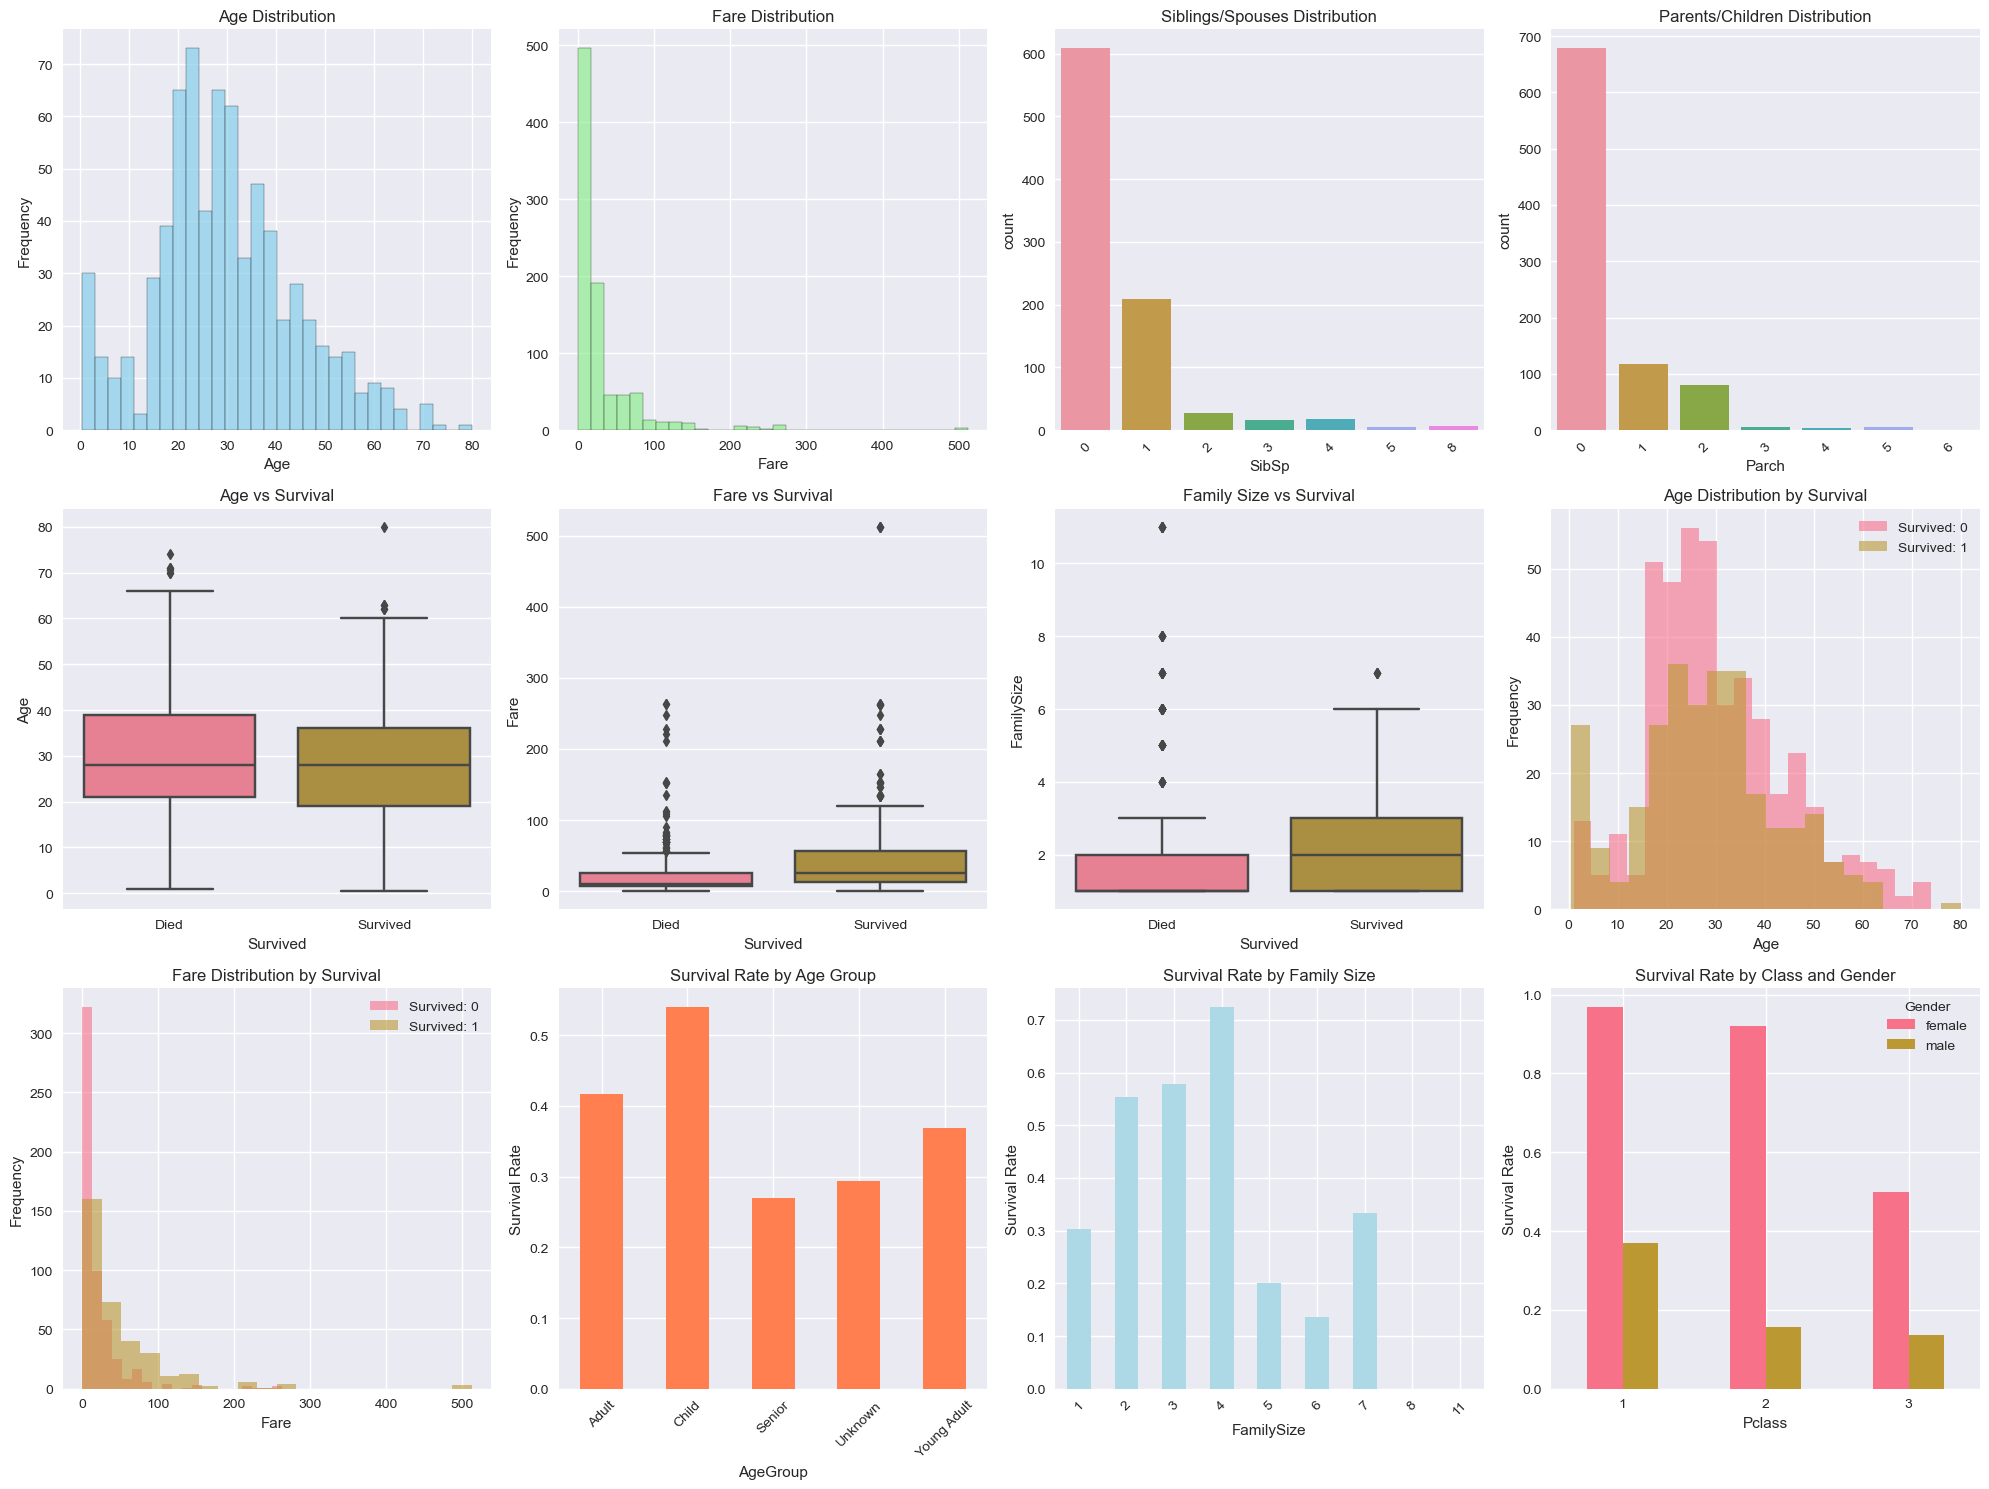

In [7]:
# Feature distribution analysis
plt.figure(figsize=(20, 15))

# Tạo feature FamilySize và AgeGroup trước khi sử dụng
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Tạo age groups
def create_age_groups(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_df['AgeGroup'] = train_df['Age'].apply(create_age_groups)

# 1. Age distribution
plt.subplot(3, 4, 1)
plt.hist(train_df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Fare distribution
plt.subplot(3, 4, 2)
plt.hist(train_df['Fare'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# 3. SibSp distribution
plt.subplot(3, 4, 3)
sns.countplot(data=train_df, x='SibSp')
plt.title('Siblings/Spouses Distribution')
plt.xticks(rotation=45)

# 4. Parch distribution
plt.subplot(3, 4, 4)
sns.countplot(data=train_df, x='Parch')
plt.title('Parents/Children Distribution')
plt.xticks(rotation=45)

# 5. Age vs Survival
plt.subplot(3, 4, 5)
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.xticks([0, 1], ['Died', 'Survived'])

# 6. Fare vs Survival
plt.subplot(3, 4, 6)
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title('Fare vs Survival')
plt.xticks([0, 1], ['Died', 'Survived'])

# 7. Family Size vs Survival
plt.subplot(3, 4, 7)
sns.boxplot(data=train_df, x='Survived', y='FamilySize')
plt.title('Family Size vs Survival')
plt.xticks([0, 1], ['Died', 'Survived'])

# 8. Age distribution by survival
plt.subplot(3, 4, 8)
for survived in [0, 1]:
    plt.hist(train_df[train_df['Survived'] == survived]['Age'].dropna(), 
             alpha=0.6, label=f'Survived: {survived}', bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# 9. Fare distribution by survival
plt.subplot(3, 4, 9)
for survived in [0, 1]:
    plt.hist(train_df[train_df['Survived'] == survived]['Fare'], 
             alpha=0.6, label=f'Survived: {survived}', bins=20)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

# 10. Survival rate by age groups
plt.subplot(3, 4, 10)
age_survival = train_df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', color='coral')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 11. Survival rate by family size
plt.subplot(3, 4, 11)
family_survival = train_df.groupby('FamilySize')['Survived'].mean()
family_survival.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 12. Survival rate by class and gender
plt.subplot(3, 4, 12)
class_sex_survival = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
class_sex_survival.plot(kind='bar', ax=plt.gca())
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


## 5. 🔗 Correlation Analysis


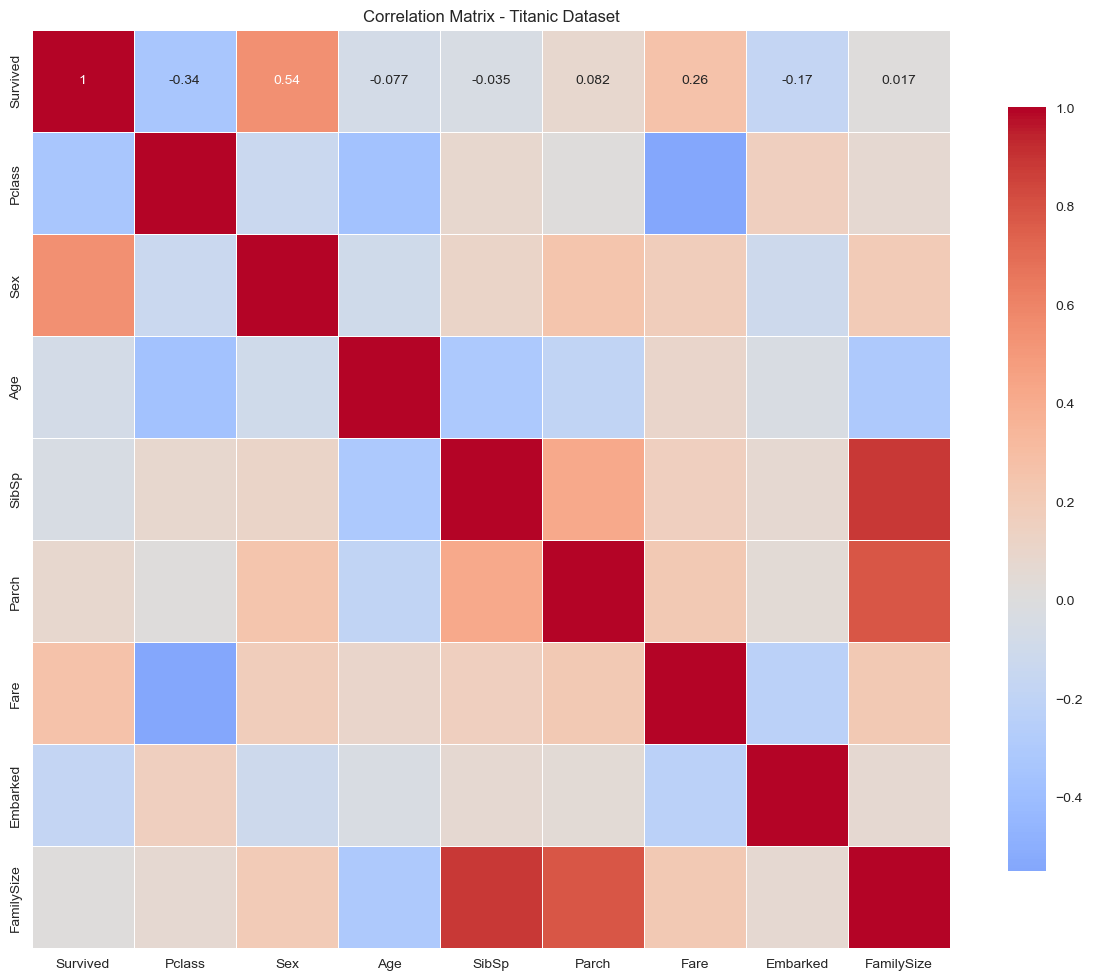

🔗 Correlation with Survival:
Sex         :  0.543
Pclass      : -0.338
Fare        :  0.257
Embarked    : -0.170
Parch       :  0.082
Age         : -0.077
SibSp       : -0.035
FamilySize  :  0.017

📊 Feature Importance Analysis:
Positive correlation (higher value = higher survival chance):
  Sex         :  0.543
  Fare        :  0.257
  Parch       :  0.082
  FamilySize  :  0.017

Negative correlation (higher value = lower survival chance):
  Pclass      : -0.338
  Embarked    : -0.170
  Age         : -0.077
  SibSp       : -0.035


In [8]:
# Correlation analysis
# Prepare data for correlation
correlation_data = train_df.copy()

# Convert categorical variables to numeric
correlation_data['Sex'] = correlation_data['Sex'].map({'male': 0, 'female': 1})
correlation_data['Embarked'] = correlation_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create correlation matrix
correlation_matrix = correlation_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']].corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Titanic Dataset')
plt.tight_layout()
plt.show()

# Print correlation with survival
print("🔗 Correlation with Survival:")
print("=" * 40)
survival_corr = correlation_matrix['Survived'].drop('Survived').sort_values(key=abs, ascending=False)
for feature, corr in survival_corr.items():
    print(f"{feature:12}: {corr:6.3f}")

# Feature importance analysis
print("\n📊 Feature Importance Analysis:")
print("=" * 40)
print("Positive correlation (higher value = higher survival chance):")
positive_features = survival_corr[survival_corr > 0]
for feature, corr in positive_features.items():
    print(f"  {feature:12}: {corr:6.3f}")

print("\nNegative correlation (higher value = lower survival chance):")
negative_features = survival_corr[survival_corr < 0]
for feature, corr in negative_features.items():
    print(f"  {feature:12}: {corr:6.3f}")


## 6. 🎯 Outlier Detection


🎯 Age Outliers:
   Count: 11 (1.2%)
   Range: [-6.69, 64.81]
   Min outlier: 65.00
   Max outlier: 80.00

🎯 Fare Outliers:
   Count: 116 (13.0%)
   Range: [-26.72, 65.63]
   Min outlier: 66.60
   Max outlier: 512.33

🎯 SibSp Outliers:
   Count: 46 (5.2%)
   Range: [-1.50, 2.50]
   Min outlier: 3.00
   Max outlier: 8.00

🎯 Parch Outliers:
   Count: 213 (23.9%)
   Range: [0.00, 0.00]
   Min outlier: 1.00
   Max outlier: 6.00

🎯 FamilySize Outliers:
   Count: 91 (10.2%)
   Range: [-0.50, 3.50]
   Min outlier: 4.00
   Max outlier: 11.00



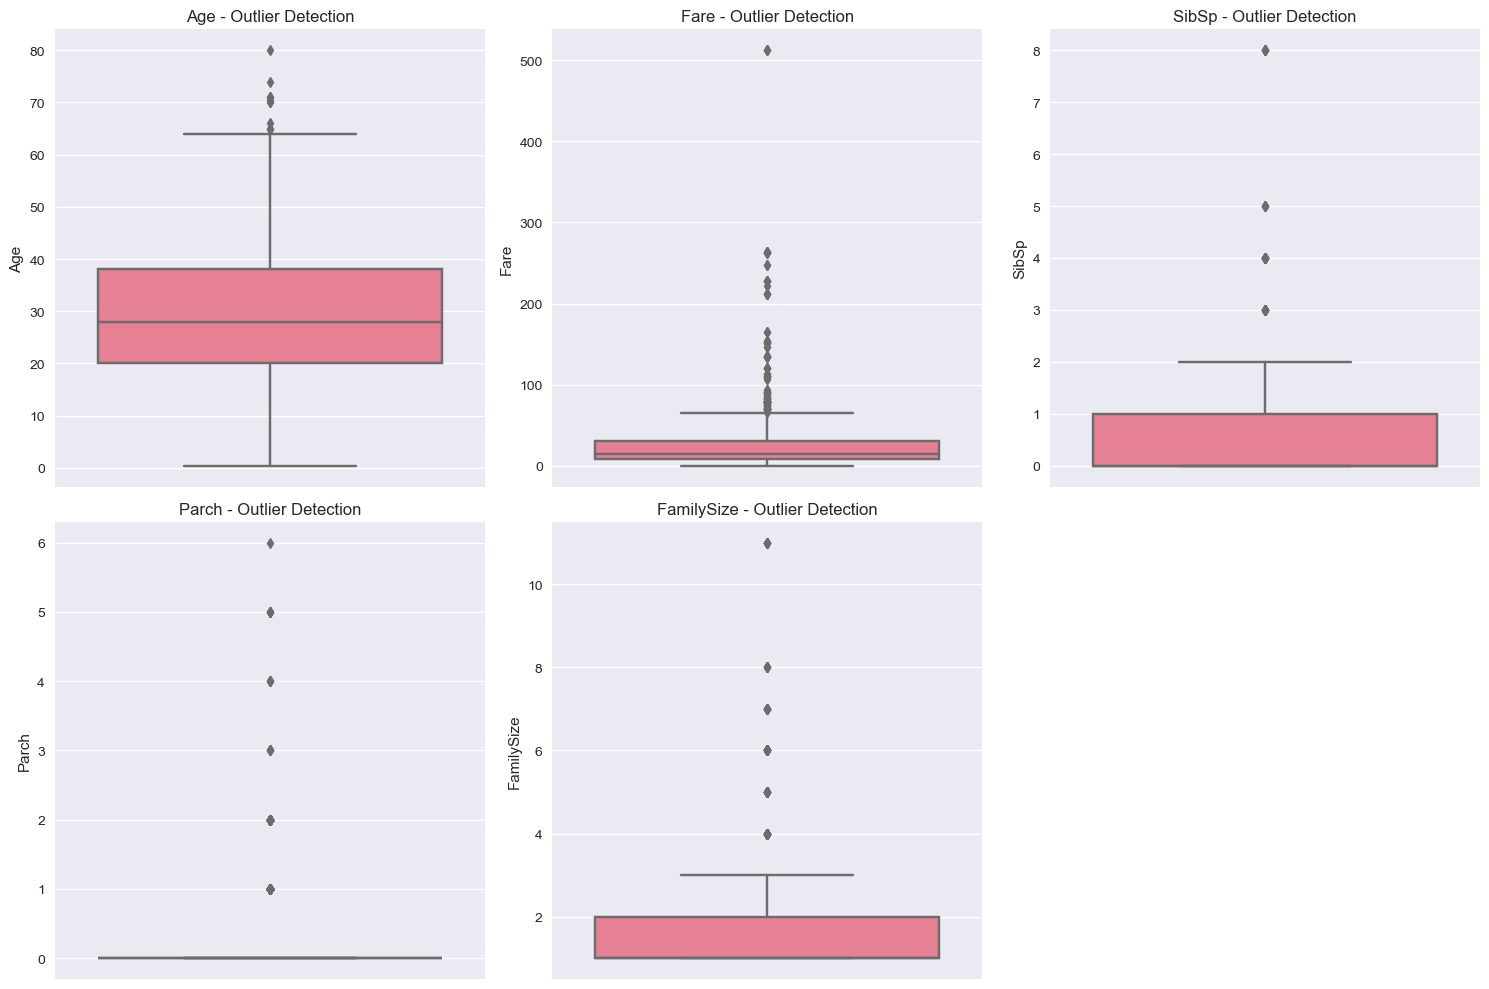

📊 Outlier Summary:


,count,percentage,lower_bound,upper_bound
Parch,213.0,23.905724,0.0000,0.0000
Fare,116.0,13.019080,-26.7240,65.6344
FamilySize,91.0,10.213244,-0.5000,3.5000
SibSp,46.0,5.162738,-1.5000,2.5000
Age,11.0,1.234568,-6.6875,64.8125


In [9]:
# Outlier detection
def detect_outliers(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
outlier_summary = {}

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    
    # Box plot
    sns.boxplot(data=train_df, y=feature)
    plt.title(f'{feature} - Outlier Detection')
    
    # Detect outliers
    outliers, lower, upper = detect_outliers(train_df, feature)
    outlier_summary[feature] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(train_df) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"🎯 {feature} Outliers:")
    print(f"   Count: {len(outliers)} ({len(outliers)/len(train_df)*100:.1f}%)")
    print(f"   Range: [{lower:.2f}, {upper:.2f}]")
    if len(outliers) > 0:
        print(f"   Min outlier: {outliers[feature].min():.2f}")
        print(f"   Max outlier: {outliers[feature].max():.2f}")
    print()

plt.tight_layout()
plt.show()

# Summary table
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("📊 Outlier Summary:")
print("=" * 50)
display(outlier_df)


## 7. 🔍 Key Insights & Next Steps


In [11]:
# Key insights summary
print("🔍 KEY INSIGHTS FROM EDA:")
print("=" * 50)

print("\n📊 SURVIVAL PATTERNS:")
print("-" * 30)
# Tính toán survival rate trực tiếp từ dữ liệu
overall_survival_rate = train_df['Survived'].mean()
print(f"• Overall survival rate: {overall_survival_rate:.1%}")
print(f"• Female survival rate: {train_df[train_df['Sex']=='female']['Survived'].mean():.1%}")
print(f"• Male survival rate: {train_df[train_df['Sex']=='male']['Survived'].mean():.1%}")
print(f"• 1st class survival rate: {train_df[train_df['Pclass']==1]['Survived'].mean():.1%}")
print(f"• 2nd class survival rate: {train_df[train_df['Pclass']==2]['Survived'].mean():.1%}")
print(f"• 3rd class survival rate: {train_df[train_df['Pclass']==3]['Survived'].mean():.1%}")

print("\n🔍 MISSING VALUES:")
print("-" * 30)
print(f"• Age: {train_df['Age'].isnull().sum()} missing ({train_df['Age'].isnull().sum()/len(train_df)*100:.1f}%)")
print(f"• Cabin: {train_df['Cabin'].isnull().sum()} missing ({train_df['Cabin'].isnull().sum()/len(train_df)*100:.1f}%)")
print(f"• Embarked: {train_df['Embarked'].isnull().sum()} missing ({train_df['Embarked'].isnull().sum()/len(train_df)*100:.1f}%)")

print("\n🎯 FEATURE CORRELATIONS WITH SURVIVAL:")
print("-" * 30)
# Tính toán correlation với Survived
survival_corr = train_df.select_dtypes(include=[np.number]).corr()['Survived'].drop('Survived').sort_values(key=abs, ascending=False)
for feature, corr in survival_corr.head(5).items():
    direction = "📈" if corr > 0 else "📉"
    print(f"• {feature:12}: {corr:6.3f} {direction}")

print("\n🚨 OUTLIERS DETECTED:")
print("-" * 30)
for feature, info in outlier_summary.items():
    if info['count'] > 0:
        print(f"• {feature:12}: {info['count']:3d} outliers ({info['percentage']:4.1f}%)")

print("\n📋 NEXT STEPS:")
print("-" * 30)
print("1. 🔧 Feature Engineering:")
print("   • Extract title from Name")
print("   • Create family size features")
print("   • Handle missing values in Age, Cabin, Embarked")
print("   • Create age groups and fare bins")
print("   • Extract cabin deck information")

print("\n2. 🤖 Model Training:")
print("   • Train baseline models (Logistic Regression, Random Forest)")
print("   • Try advanced models (XGBoost, Neural Networks)")
print("   • Implement cross-validation")

print("\n3. 🎯 Model Optimization:")
print("   • Hyperparameter tuning")
print("   • Feature selection")
print("   • Ensemble methods")

print("\n4. 📊 Model Evaluation:")
print("   • Performance metrics")
print("   • Feature importance analysis")
print("   • Model comparison")

print("\n✅ EDA Analysis Complete!")
print("🚀 Ready to proceed to Feature Engineering!")


🔍 KEY INSIGHTS FROM EDA:

📊 SURVIVAL PATTERNS:
------------------------------
• Overall survival rate: 38.4%
• Female survival rate: 74.2%
• Male survival rate: 18.9%
• 1st class survival rate: 63.0%
• 2nd class survival rate: 47.3%
• 3rd class survival rate: 24.2%

🔍 MISSING VALUES:
------------------------------
• Age: 177 missing (19.9%)
• Cabin: 687 missing (77.1%)
• Embarked: 2 missing (0.2%)

🎯 FEATURE CORRELATIONS WITH SURVIVAL:
------------------------------
• Pclass      : -0.338 📉
• Fare        :  0.257 📈
• Parch       :  0.082 📈
• Age         : -0.077 📉
• SibSp       : -0.035 📉

🚨 OUTLIERS DETECTED:
------------------------------
• Age         :  11 outliers ( 1.2%)
• Fare        : 116 outliers (13.0%)
• SibSp       :  46 outliers ( 5.2%)
• Parch       : 213 outliers (23.9%)
• FamilySize  :  91 outliers (10.2%)

📋 NEXT STEPS:
------------------------------
1. 🔧 Feature Engineering:
   • Extract title from Name
   • Create family size features
   • Handle missing values in Ag

## 3. 🎯 Survival Patterns Exploration


🎯 Overall Survival Rate: 38.38%
💀 Total Passengers: 891
✅ Survived: 342
❌ Died: 549

👥 Survival by Gender:


,Total,Survived,Survival_Rate
Sex,,,
female,314,233,0.742038
male,577,109,0.188908



🎫 Survival by Class:


,Total,Survived,Survival_Rate
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363



🚢 Survival by Embarkation:


,Total,Survived,Survival_Rate
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957



🎂 Survival by Age Group:


,Total,Survived,Survival_Rate
AgeGroup,,,
Child,69,40,0.579710
Teen,70,30,0.428571
Adult,358,137,0.382682
Middle,195,78,0.400000
Senior,22,5,0.227273



👨‍👩‍👧‍👦 Survival by Family Size:


,Total,Survived,Survival_Rate
FamilySize,,,
1,537,163,0.303538
2,161,89,0.552795
3,102,59,0.578431
4,29,21,0.724138
5,15,3,0.200000
6,22,3,0.136364
7,12,4,0.333333
8,6,0,0.000000
11,7,0,0.000000


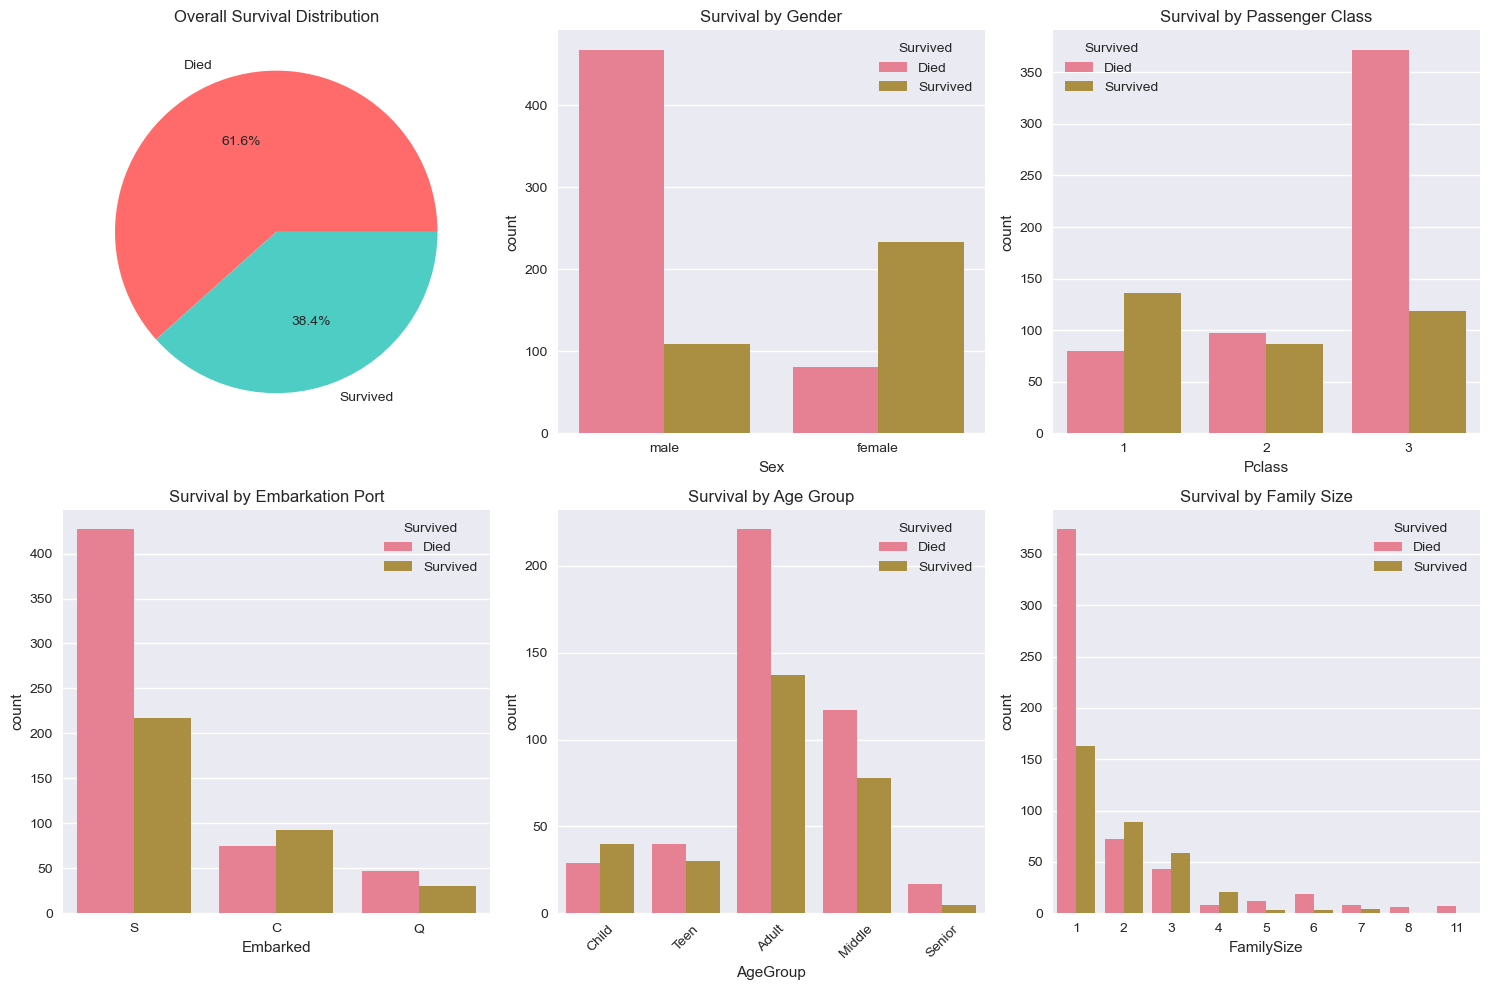

In [13]:
# Overall survival rate
survival_rate = train_df['Survived'].mean()
print(f"🎯 Overall Survival Rate: {survival_rate:.2%}")
print(f"💀 Total Passengers: {len(train_df)}")
print(f"✅ Survived: {train_df['Survived'].sum()}")
print(f"❌ Died: {len(train_df) - train_df['Survived'].sum()}")

# Survival distribution
plt.figure(figsize=(15, 10))

# 1. Overall survival
plt.subplot(2, 3, 1)
survival_counts = train_df['Survived'].value_counts()
plt.pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4'])
plt.title('Overall Survival Distribution')

# 2. Survival by Gender
plt.subplot(2, 3, 2)
survival_by_sex = train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_sex.columns = ['Total', 'Survived', 'Survival_Rate']
print("\n👥 Survival by Gender:")
display(survival_by_sex)

# Chuyển đổi Survived thành string để tránh lỗi với legend
train_df_plot = train_df.copy()
train_df_plot['Survived'] = train_df_plot['Survived'].map({0: 'Died', 1: 'Survived'})

sns.countplot(data=train_df_plot, x='Sex', hue='Survived')
plt.title('Survival by Gender')

# 3. Survival by Class
plt.subplot(2, 3, 3)
survival_by_class = train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_class.columns = ['Total', 'Survived', 'Survival_Rate']
print("\n🎫 Survival by Class:")
display(survival_by_class)

sns.countplot(data=train_df_plot, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')

# 4. Survival by Embarkation
plt.subplot(2, 3, 4)
survival_by_embark = train_df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_embark.columns = ['Total', 'Survived', 'Survival_Rate']
print("\n🚢 Survival by Embarkation:")
display(survival_by_embark)

sns.countplot(data=train_df_plot, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')

# 5. Survival by Age Groups
plt.subplot(2, 3, 5)
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                              labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
train_df_plot['AgeGroup'] = train_df['AgeGroup']
survival_by_age = train_df.groupby('AgeGroup')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_age.columns = ['Total', 'Survived', 'Survival_Rate']
print("\n🎂 Survival by Age Group:")
display(survival_by_age)

sns.countplot(data=train_df_plot, x='AgeGroup', hue='Survived')
plt.title('Survival by Age Group')
plt.xticks(rotation=45)

# 6. Survival by Family Size
plt.subplot(2, 3, 6)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df_plot['FamilySize'] = train_df['FamilySize']
survival_by_family = train_df.groupby('FamilySize')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_family.columns = ['Total', 'Survived', 'Survival_Rate']
print("\n👨‍👩‍👧‍👦 Survival by Family Size:")
display(survival_by_family)

sns.countplot(data=train_df_plot, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')

plt.tight_layout()
plt.show()
